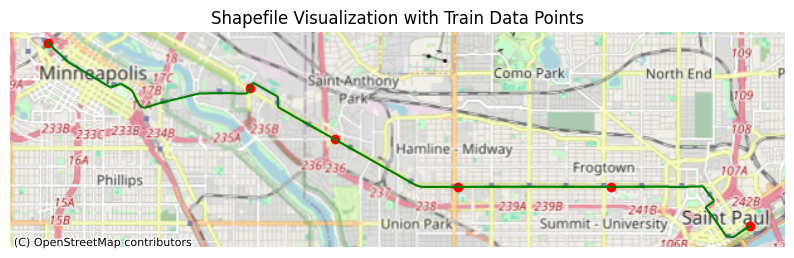

In [21]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import json

# Replace this with your API URL
api_url = 'https://svc.metrotransit.org/nextrip/vehicles/902'

# Making a GET request
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON response
    data = response.json()

    # Create a GeoDataFrame to store the points
    points = []
    for train in data:
        latitude = train['latitude']
        longitude = train['longitude']
        point = Point(longitude, latitude)
        points.append(point)
    gdf_points = gpd.GeoDataFrame(data, geometry=points, crs='EPSG:4326')

    # Load your shapefile (replace with your shapefile path)
    shapefile_path = 'green_line.shp'
    gdf_shapefile = gpd.read_file(shapefile_path)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_shapefile.plot(ax=ax, color='green', edgecolor='black')  # Plot shapefile

    # Plot train data points
    gdf_points.to_crs(gdf_shapefile.crs.to_string()).plot(ax=ax, color='red', marker='o')

    # Add a basemap
    ctx.add_basemap(ax, crs=gdf_shapefile.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

    # Optional: Customize the plot
    ax.set_title('Shapefile Visualization with Train Data Points')
    ax.set_axis_off()

    plt.show()
else:
    print("Failed to retrieve data:", response.status_code)


KeyboardInterrupt: 

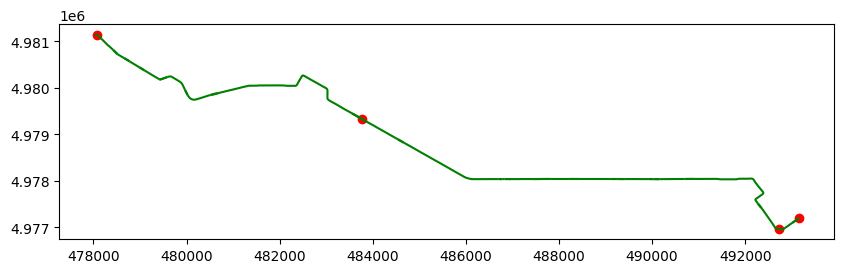

In [31]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import json
import time
from IPython.display import display, clear_output

# Replace this with your API URL
api_url = 'https://svc.metrotransit.org/nextrip/vehicles/902'

# Load your shapefile (replace with your shapefile path)
shapefile_path = 'green_line.shp'

# Number of frames for the animation (adjust as needed)
num_frames = 100

# Create the initial plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf_shapefile = gpd.read_file(shapefile_path)
gdf_shapefile.plot(ax=ax, color='blue', edgecolor='black')
ax.set_title('Shapefile Visualization with Train Data Points')
ax.set_axis_off()

# Update the plot in a loop
for _ in range(num_frames):
    # Making a GET request
    response = requests.get(api_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse JSON response
        data = response.json()

        # Create a GeoDataFrame to store the points
        points = []
        for train in data:
            latitude = train['latitude']
            longitude = train['longitude']
            point = Point(longitude, latitude)
            points.append(point)
        gdf_points = gpd.GeoDataFrame(data, geometry=points, crs='EPSG:4326')

        # Clear the previous plot
        ax.cla()

        # Plot shapefile
        gdf_shapefile.plot(ax=ax, color='green', edgecolor='black')

        # Plot train data points
        gdf_points.to_crs(gdf_shapefile.crs.to_string()).plot(ax=ax, color='red', marker='o')

        # Add a basemap
        ctx.add_basemap(ax, crs=gdf_shapefile.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

        # Optional: Customize the plot
        ax.set_title('Shapefile Visualization with Train Data Points')
        ax.set_axis_off()

        # Display the updated plot in real-time
        display(fig)
        clear_output(wait=True)

        # Pause for 5 seconds before the next update
        time.sleep(5)

    else:
        print("Failed to retrieve data:", response.status_code)
